In [3]:
#import necessary packages
import numpy as np
import sys
import math
import re
import isoprene_rates as rate
from math import exp as EXP
from copy import deepcopy
import sympy as sym
import networkx as nx
import matplotlib.pyplot as plt
#import graphviz 
#import pygraphviz as pgv
#import to_precision
import time
import csv
import pandas as pd
import random
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.csgraph import csgraph_from_dense
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import connected_components
#from sklearn.preprocessing import normalize

In [4]:
data_t = pd.read_csv('/Users/woods/OneDrive/Documents/Python/Code/AMORE v2 ISOP Data Bias Plot 24 Hour.csv')
# 9 is old data, 8 is new data

In [39]:
data_t = pd.read_csv('/Users/woods/OneDrive/Documents/Python/Code/AMORE v2 ISOP Data Bias Plot 12 Hour.csv')
# 9 is old data, 8 is new data

In [69]:
data_t = pd.read_csv('/Users/woods/OneDrive/Documents/Python/Code/AMORE v2 ISOP Data Bias Plot 6 Hour.csv')
# 9 is old data, 8 is new data

In [94]:
data_t = pd.read_csv('/Users/woods/OneDrive/Documents/Python/Code/AMORE v2 ISOP Data Bias Plot 15.csv')
# 9 is old data, 8 is new data

In [96]:
specs = ['OH','HO2','NO','NO2','HCHO', 'IEPOX']

In [7]:
data_t

,Mechanism,Species,Condition 1,Condition 2,Condition 3,Condition 4,Condition 5,Condition 6,Condition 7,Condition 8,...,Condition 991,Condition 992,Condition 993,Condition 994,Condition 995,Condition 996,Condition 997,Condition 998,Condition 999,Condition 1000
0,AMORE v2 109sp,OH,0.012943,5.420487e-03,0.002691,0.003334,0.033715,0.005490,0.002318,0.007857,...,0.005776,0.010244,0.001570,-0.001637,-0.005130,0.008204,-0.005735,-0.001610,2.544200e-03,4.138512e-03
1,AMORE v2 109sp,HO2,-0.028041,1.357248e-02,-0.032009,0.002833,-0.041692,0.003584,0.002175,-0.002055,...,0.018876,0.019998,0.000320,-0.002892,-0.028815,0.003656,-0.012394,-0.010190,9.715009e-03,1.679600e-02
2,AMORE v2 109sp,NO,0.014350,6.090000e-09,0.014001,0.000005,0.031278,0.013815,0.000166,0.016021,...,0.008268,0.002024,0.000023,0.000070,0.028600,0.001105,0.010136,0.006153,4.410000e-06,3.140000e-08
3,AMORE v2 109sp,NO2,-0.019902,5.706330e-04,-0.024672,0.000660,-0.109817,0.007356,0.000204,0.010584,...,0.016475,-0.177392,0.000236,0.000574,-0.174386,0.001257,0.010219,0.012358,1.369190e-03,9.728880e-04
4,AMORE v2 109sp,HCHO,0.015798,1.925477e-02,0.007466,0.005838,0.028196,-0.005236,0.006033,-0.004354,...,0.023488,0.021818,0.002694,-0.000867,0.016670,0.004962,-0.016486,-0.022754,1.613018e-02,2.298075e-02
5,AMORE v2 109sp,IEPOX,0.000950,-1.110000e-05,-0.000180,-0.000015,-0.003087,0.006687,-0.000019,0.011150,...,-0.000089,-0.000012,-0.000010,-0.000025,-0.000723,-0.000067,0.010724,0.011431,-1.820000e-05,-1.040000e-05
6,AMORE v2 74sp,OH,0.186995,2.109496e-02,0.165563,0.041413,0.079119,0.113878,0.028631,0.150068,...,0.047430,0.058276,0.025378,0.033919,0.015794,0.055390,0.162148,0.191534,2.912163e-02,2.103496e-02
7,AMORE v2 74sp,HO2,-0.035339,1.192315e-02,-0.035861,0.019189,-0.031060,0.013950,0.011923,0.011213,...,0.028799,0.009579,0.010430,0.014134,-0.010232,0.019897,0.001758,0.010218,1.653380e-02,1.245476e-02
8,AMORE v2 74sp,NO,0.024328,1.220000e-08,0.021769,0.000008,0.034126,0.016035,0.000195,0.021197,...,0.012896,0.006810,0.000029,0.000076,0.028348,0.001323,0.013621,0.008633,6.830000e-06,5.110000e-08
9,AMORE v2 74sp,NO2,-0.014793,-1.757380e-03,-0.022090,0.001619,-0.071012,0.010078,0.000754,0.013439,...,0.014717,-0.202508,0.001161,0.002923,-0.140517,0.001816,0.013291,0.018137,-5.010730e-04,-2.308704e-03


In [100]:
#df = pandas.DataFrame(np.zeros(0,0), columns=list('Mech 1','Mech 2'))
spec_list = []
mech_list = [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6]
#mech_list = ['Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp']
mech_list = ['Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp']#,'Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp']
for i in range(999):
    mech_list.extend(['Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE v2 109sp','AMORE v2 74sp', 'AMORE v2 15sp'])
iepox_data = []
no_data = []
no2_data = []
oh_data = []
ho2_data = []
hcho_data = []
dont_list = ['Mechanism','Species']
for i in data_t:
    if i not in dont_list:
        for j in range(len(data_t[i])):
            if data_t['Species'][j]=='IEPOX':
                iepox_data.append(data_t[i][j])
            elif data_t['Species'][j]=='NO':
                no_data.append(data_t[i][j])
            elif data_t['Species'][j]=='NO2':
                no2_data.append(data_t[i][j])
            elif data_t['Species'][j]=='OH':
                oh_data.append(data_t[i][j])
            elif data_t['Species'][j]=='HO2':
                ho2_data.append(data_t[i][j])
            elif data_t['Species'][j]=='HCHO':
                hcho_data.append(data_t[i][j])

In [9]:
#df = pandas.DataFrame(np.zeros(0,0), columns=list('Mech 1','Mech 2'))
spec_list = []
mech_list = [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6]
#mech_list = ['Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp','Caltech Reduced Plus','Caltech Mini','AMORE 68sp','AMORE 53sp','AMORE v1.2', 'AMORE 2.0 15sp']
mech_list = ['AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2']#,'Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2','AMORE 68sp','AMORE 53sp', 'AMORE 15sp']
for i in range(999):
    mech_list.extend(['AMORE v2 109sp','AMORE v2 74sp', 'AMORE v2 15sp','Caltech Reduced Plus','Caltech Mini','AMORE v1.2'])
iepox_data = []
no_data = []
no2_data = []
oh_data = []
ho2_data = []
hcho_data = []
dont_list = ['Mechanism','Species']
for i in data_t:
    if i not in dont_list:
        for j in range(len(data_t[i])):
            if data_t['Species'][j]=='IEPOX':
                iepox_data.append(data_t[i][j])
            elif data_t['Species'][j]=='NO':
                no_data.append(data_t[i][j])
            elif data_t['Species'][j]=='NO2':
                no2_data.append(data_t[i][j])
            elif data_t['Species'][j]=='OH':
                oh_data.append(data_t[i][j])
            elif data_t['Species'][j]=='HO2':
                ho2_data.append(data_t[i][j])
            elif data_t['Species'][j]=='HCHO':
                hcho_data.append(data_t[i][j])

In [49]:
for i in range(len(oh_data)):
    if oh_data[i]<-1.5:
        oh_data[i]=-1.5

In [60]:
for i in range(len(no_data)):
    if no_data[i]<-1.5:
        no_data[i]=-1.5

In [61]:
for i in range(len(no2_data)):
    if no2_data[i]<-1.5:
        no2_data[i]=-1.5

In [155]:
for i in range(len(hcho_data)):
    if hcho_data[i]>1.5:
        hcho_data[i]=1.5

In [157]:
for i in range(len(iepox_data)):
    if iepox_data[i]>1.5:
        iepox_data[i]=1.5

In [14]:
for i in range(len(no2_data)):
    if no2_data[i]<-3.2:
        no2_data[i]=0

In [161]:
for i in range(len(ho2_data)):
    if ho2_data[i]>1.5:
        ho2_data[i]=1.5

In [163]:
max(ho2_data)

1.5

In [15]:
df = pd.DataFrame([oh_data, ho2_data, no_data, no2_data, iepox_data, hcho_data, mech_list])#, columns = ['Mechanism 1', 'Mechanism 2', 'Species'])

In [16]:
dfT = df.T
dfT.columns = ['OH', 'HO$_2$','NO','NO$_2$','IEPOX','HCHO', 'Mechanism']
dfT

,OH,HO$_2$,NO,NO$_2$,IEPOX,HCHO,Mechanism
0,0.012943,-0.028041,0.01435,-0.019902,0.00095,0.015798,AMORE 68sp
1,0.186995,-0.035339,0.024328,-0.014793,-0.000345,0.013632,AMORE 53sp
2,0.233551,0.125833,0.028081,0.035176,0.002664,0.153295,AMORE 15sp
3,-0.030285,0.115017,-0.057834,0.080795,0.001904,0.190112,Caltech Reduced Plus
4,0.298959,-0.064299,0.060231,-0.040778,0.003327,0.027137,Caltech Mini
...,...,...,...,...,...,...,...
5995,0.021035,0.012455,0.0,-0.002309,0.000573,0.008778,AMORE v2 74sp
5996,0.073327,0.07414,0.000001,0.087763,0.000346,-0.114155,AMORE v2 15sp
5997,0.067718,0.087049,0.0,0.002813,0.00001,0.303242,Caltech Reduced Plus
5998,0.075369,0.092261,0.0,0.003017,0.000006,0.353622,Caltech Mini


In [19]:
import numpy
import pandas
from matplotlib import pyplot
import seaborn
seaborn.set()


In [21]:
min(no2_data)

-0.88659957

In [75]:
seaborn.set_theme(rc={'figure.figsize':(4.8,3)})

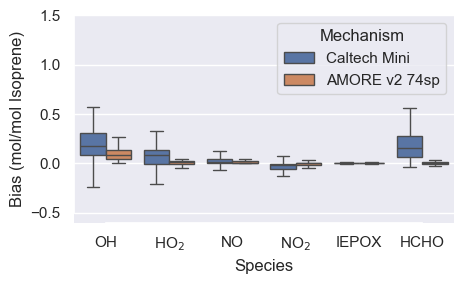

In [77]:
ax = (
    dfT.set_index('Mechanism', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows 
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'Species', 0: 'Bias (mol/mol Isoprene)'})  # rename columns
      .drop('level_0', axis='columns')   # drop junk columns
      .pipe((seaborn.boxplot, 'data'), x='Species', y='Bias (mol/mol Isoprene)', whis=1.5, showfliers=False, hue='Mechanism', hue_order=['Caltech Mini','AMORE v2 74sp'])  
)
plt.yticks([-0.5, 0,0.5,1.0,1.5]) 

seaborn.despine(trim=True)
ax.set(ylim=(-0.6, 1.5))

plt.tight_layout()

plt.savefig('box_plot_mini.svg')

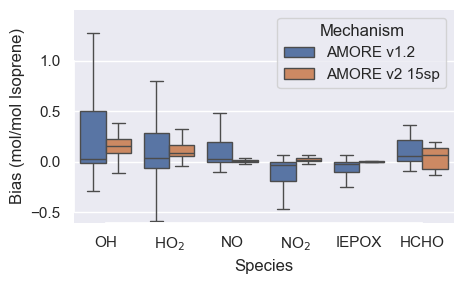

In [79]:
ax = (
    dfT.set_index('Mechanism', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows 
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'Species', 0: 'Bias (mol/mol Isoprene)'})  # rename columns
      .drop('level_0', axis='columns')   # drop junk columns
      .pipe((seaborn.boxplot, 'data'), x='Species', y='Bias (mol/mol Isoprene)', whis=1.5,showfliers=False,hue='Mechanism', hue_order=['AMORE v1.2','AMORE v2 15sp'])  
)
seaborn.despine(trim=True)
ax.set(ylim=(-0.6, 1.5))

#ax.set(ylim=(-1.5, 1.5))
plt.tight_layout()


plt.savefig('box_plot_amo.svg')

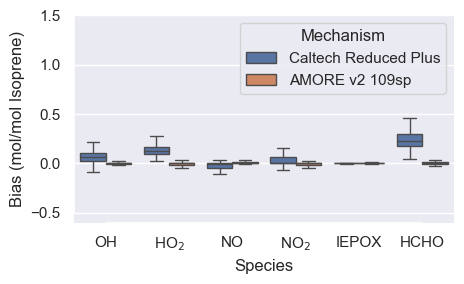

In [81]:
ax = (
    dfT.set_index('Mechanism', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows 
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'Species', 0: 'Bias (mol/mol Isoprene)'})  # rename columns
      .drop('level_0', axis='columns')   # drop junk columns
      .pipe((seaborn.boxplot, 'data'), x='Species', y='Bias (mol/mol Isoprene)', whis=1.5,showfliers=False, hue='Mechanism', hue_order=['Caltech Reduced Plus','AMORE v2 109sp'])  
)
ax.set(ylim=(-0.6, 1.5))
seaborn.despine(trim=True)
plt.tight_layout()


plt.savefig('box_plot_rp.svg')

In [33]:
df['E']

KeyError: 'E'

In [156]:
data_c = pd.read_csv('/Users/woods/OneDrive/Documents/Python/Code/GA_AMORE_conc_profiles.csv')

In [157]:
data_c

,Mechanism,Full mech,Full mech.1,Full mech.2,Full mech.3,Full mech.4,Full mech.5,Full mech.6,Full mech.7,Full mech.8,...,GA.2,GA.3,GA.4,GA.5,GA.6,GA.7,GA.8,GA.9,GA.10,GA.11
0,Condition,2,2,2,2,2,2,3,3,3,...,2,2,3,3,3,3,4,4,4,4
1,Species,Time,HCHO,ISOP1OH23O4OHt,ISOP1OH23O4OHc,ISOP1OH2OH34O,MACR,Time,HCHO,ISOP1OH23O4OHt,...,IEPOX,MACR,Time,HCHO,IEPOX,MACR,Time,HCHO,IEPOX,MACR
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,9.07E-11,1.94E-28,1.01E-47,4.89E-48,4.56E-44,6.63E-29,6.42E-10,3.02E-14,1.75E-46,...,1.90E-24,1.07E-09,9.77E-07,7.25E-09,6.16E-10,2.02E-09,2.79E-05,5.28E-10,2.75E-18,1.18E-10
4,NaN,1.81E-10,8.38E-28,6.71E-47,3.24E-47,2.49E-43,2.86E-28,1.28E-09,6.04E-14,1.16E-45,...,8.20E-24,2.14E-09,1.95E-06,1.45E-08,1.23E-09,4.05E-09,5.57E-05,1.06E-09,8.69E-18,2.37E-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,246770.6825,3.820306446,2.14E-06,2.02E-09,1.54E-07,1.213402692,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,NaN,250189.4059,3.820315526,1.82E-06,1.57E-09,1.34E-07,1.213402692,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,NaN,253608.1293,3.820324099,1.55E-06,1.22E-09,1.17E-07,1.213402692,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,NaN,257026.8527,3.820332195,1.32E-06,9.53E-10,1.02E-07,1.213402692,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'15 sp'

In [165]:
data_c.keys()

Index(['Mechanism', ' Full mech', ' Full mech.1', ' Full mech.2',
       ' Full mech.3', ' Full mech.4', ' Full mech.5', ' Full mech.6',
       ' Full mech.7', ' Full mech.8', ' Full mech.9', ' Full mech.10',
       ' Full mech.11', ' Full mech.12', ' Full mech.13', ' Full mech.14',
       ' Full mech.15', ' Full mech.16', ' Full mech.17', 'AMORE', 'AMORE.1',
       'AMORE.2', 'AMORE.3', 'AMORE.4', 'AMORE.5', 'AMORE.6', 'AMORE.7',
       'AMORE.8', 'AMORE.9', 'AMORE.10', 'AMORE.11', 'GA', 'GA.1', 'GA.2',
       'GA.3', 'GA.4', 'GA.5', 'GA.6', 'GA.7', 'GA.8', 'GA.9', 'GA.10',
       'GA.11'],
      dtype='object')

In [223]:
data_c[' Full mech.10']

0                  3
1      ISOP1OH2OH34O
2                  0
3           1.14E-43
4           6.22E-43
           ...      
437              NaN
438              NaN
439              NaN
440              NaN
441              NaN
Name:  Full mech.10, Length: 442, dtype: object

In [175]:
for i in x_values3:
    print(float(i))

0.0
2.51e-06
5.03e-06
7.54e-06
2.01e-05
3.27e-05
4.53e-05
5.79e-05
9.88e-05
0.000139718
0.000180641
0.000221564
0.000504973
0.000788383
0.001071793
0.001355202
0.002018394
0.002681585
0.003344777
0.004007969
0.00467116
0.006836959
0.009002757
0.011168555
0.013334354
0.015500152
0.01766595
0.025468947
0.033271943
0.04107494
0.048877936
0.056680932
0.064483929
0.124817735
0.185151541
0.245485347
0.305819154
0.36615296
0.426486766
0.538205441
0.649924117
0.761642792
0.873361467
0.985080143
1.096798818
1.309335219
1.521871619
1.73440802
1.94694442
2.159480821
2.372017221
2.829582924
3.287148626
3.744714328
4.20228003
4.659845732
5.117411434
6.114752936
7.112094437
8.109435938
9.106777439
10.10411894
11.10146044
13.89728483
16.69310922
19.48893361
22.28475799
25.08058238
27.87640677
36.21721693
44.55802709
52.89883725
61.23964742
69.58045758
88.09161614
106.6027747
125.1139333
143.6250918
162.1362504
180.647409
242.5004371
304.3534652
366.2064932
428.0595213
489.9125494
551.7655775
678.7214

In [234]:
259200.0/3600

72.0

In [236]:
import matplotlib.pyplot as plt




x_values1= [float(i)/3600 for i in data_c[' Full mech'][2:]]
x_values1.extend([float(i)/3600 for i in data_c['AMORE'][2:]])
x_values1.extend([float(i)/3600 for i in data_c['GA'][2:]])

y_values1= [float(i) for i in data_c[' Full mech.1'][2:]]
y_values1.extend([float('nan') for i in data_c['AMORE.1'][2:]])
y_values1.extend([float('nan') for i in data_c['GA.1'][2:]])

z_values1 = [float('nan') for i in data_c[' Full mech.1'][2:]]
z_values1.extend([float(i) for i in data_c['AMORE.1'][2:]])
z_values1.extend([float('nan') for i in data_c['GA.1'][2:]])

w_values1 = [float('nan') for i in data_c[' Full mech.1'][2:]]
w_values1.extend([float('nan') for i in data_c['AMORE.1'][2:]])
w_values1.extend([float(i) for i in data_c['GA.1'][2:]])




x_values2 = [float(i)/3600 for i in data_c[' Full mech.6'][2:]]
x_values2.extend([float(i)/3600 for i in data_c['AMORE.4'][2:]])
x_values2.extend([float(i)/3600 for i in data_c['GA.4'][2:]])

y_values2= [float(i) for i in data_c[' Full mech.7'][2:]]
y_values2.extend([float('nan') for i in data_c['AMORE.5'][2:]])
y_values2.extend([float('nan') for i in data_c['GA.5'][2:]])

z_values2 = [float('nan') for i in data_c[' Full mech.7'][2:]]
z_values2.extend([float(i) for i in data_c['AMORE.5'][2:]])
z_values2.extend([float('nan') for i in data_c['GA.5'][2:]])

w_values2 = [float('nan') for i in data_c[' Full mech.7'][2:]]
w_values2.extend([float('nan') for i in data_c['AMORE.5'][2:]])
w_values2.extend([float(i) for i in data_c['GA.5'][2:]])





x_values3 = [float(i)/3600 for i in data_c[' Full mech.12'][2:]]
x_values3.extend([float(i)/3600 for i in data_c['AMORE.8'][2:]])
x_values3.extend([float(i)/3600 for i in data_c['GA.8'][2:]])

y_values3= [float(i) for i in data_c[' Full mech.13'][2:]]
y_values3.extend([float('nan') for i in data_c['AMORE.9'][2:]])
y_values3.extend([float('nan') for i in data_c['GA.9'][2:]])

z_values3 = [float('nan') for i in data_c[' Full mech.13'][2:]]
z_values3.extend([float(i) for i in data_c['AMORE.9'][2:]])
z_values3.extend([float('nan') for i in data_c['GA.9'][2:]])

w_values3 = [float('nan') for i in data_c[' Full mech.13'][2:]]
w_values3.extend([float('nan') for i in data_c['AMORE.9'][2:]])
w_values3.extend([float(i) for i in data_c['GA.9'][2:]])



x_values4 = [float(i)/3600 for i in data_c[' Full mech'][2:]]
x_values4.extend([float(i)/3600 for i in data_c['AMORE'][2:]])
x_values4.extend([float(i)/3600 for i in data_c['GA'][2:]])

iep = [0 for i in range(len(data_c[' Full mech.2'][2:]))]
for i in range(len(data_c[' Full mech.2'][2:])):
    iep[i] += float(data_c[' Full mech.2'][2:][i+2])
    iep[i] += float(data_c[' Full mech.3'][2:][i+2])
    iep[i] += float(data_c[' Full mech.4'][2:][i+2])
y_values4 = deepcopy(iep)
y_values4.extend([float('nan') for i in data_c['AMORE.2'][2:]])
y_values4.extend([float('nan') for i in data_c['GA.2'][2:]])

z_values4 = [float('nan') for i in data_c[' Full mech.2'][2:]]
z_values4.extend([float(i) for i in data_c['AMORE.2'][2:]])
z_values4.extend([float('nan') for i in data_c['GA.2'][2:]])

w_values4 = [float('nan') for i in data_c[' Full mech.2'][2:]]
w_values4.extend([float('nan') for i in data_c['AMORE.2'][2:]])
w_values4.extend([float(i) for i in data_c['GA.2'][2:]])




x_values5 = [float(i)/3600 for i in data_c[' Full mech.6'][2:]]
x_values5.extend([float(i)/3600 for i in data_c['AMORE.4'][2:]])
x_values5.extend([float(i)/3600 for i in data_c['GA.4'][2:]])

iep = [0 for i in range(len(data_c[' Full mech.6'][2:]))]
for i in range(len(data_c[' Full mech.8'][2:])):
    iep[i] += float(data_c[' Full mech.8'][2:][i+2])
    iep[i] += float(data_c[' Full mech.9'][2:][i+2])
    iep[i] += float(data_c[' Full mech.10'][2:][i+2])
y_values5 = deepcopy(iep)
y_values5.extend([float('nan') for i in data_c['AMORE.6'][2:]])
y_values5.extend([float('nan') for i in data_c['GA.6'][2:]])

z_values5 = [float('nan') for i in data_c[' Full mech.8'][2:]]
z_values5.extend([float(i) for i in data_c['AMORE.6'][2:]])
z_values5.extend([float('nan') for i in data_c['GA.6'][2:]])

w_values5 = [float('nan') for i in data_c[' Full mech.8'][2:]]
w_values5.extend([float('nan') for i in data_c['AMORE.6'][2:]])
w_values5.extend([float(i) for i in data_c['GA.6'][2:]])





x_values6 = [float(i)/3600 for i in data_c[' Full mech.12'][2:]]
x_values6.extend([float(i)/3600 for i in data_c['AMORE.8'][2:]])
x_values6.extend([float(i)/3600 for i in data_c['GA.8'][2:]])

iep = [0 for i in range(len(data_c[' Full mech.12'][2:]))]
for i in range(len(data_c[' Full mech.14'][2:])):
    iep[i] += float(data_c[' Full mech.14'][2:][i+2])
    iep[i] += float(data_c[' Full mech.15'][2:][i+2])
    iep[i] += float(data_c[' Full mech.16'][2:][i+2])
y_values6 = deepcopy(iep)
y_values6.extend([float('nan') for i in data_c['AMORE.10'][2:]])
y_values6.extend([float('nan') for i in data_c['GA.10'][2:]])

z_values6 = [float('nan') for i in data_c[' Full mech.14'][2:]]
z_values6.extend([float(i) for i in data_c['AMORE.10'][2:]])
z_values6.extend([float('nan') for i in data_c['GA.10'][2:]])

w_values6 = [float('nan') for i in data_c[' Full mech.14'][2:]]
w_values6.extend([float('nan') for i in data_c['AMORE.10'][2:]])
w_values6.extend([float(i) for i in data_c['GA.10'][2:]])






x_values7 = [float(i)/3600 for i in data_c[' Full mech'][2:]]
x_values7.extend([float(i)/3600 for i in data_c['AMORE'][2:]])
x_values7.extend([float(i)/3600 for i in data_c['GA'][2:]])

y_values7= [float(i) for i in data_c[' Full mech.5'][2:]]
y_values7.extend([float('nan') for i in data_c['AMORE.3'][2:]])
y_values7.extend([float('nan') for i in data_c['GA.3'][2:]])

z_values7 = [float('nan') for i in data_c[' Full mech.5'][2:]]
z_values7.extend([float(i) for i in data_c['AMORE.3'][2:]])
z_values7.extend([float('nan') for i in data_c['GA.3'][2:]])

w_values7 = [float('nan') for i in data_c[' Full mech.5'][2:]]
w_values7.extend([float('nan') for i in data_c['AMORE.3'][2:]])
w_values7.extend([float(i) for i in data_c['GA.3'][2:]])




x_values8 = [float(i)/3600 for i in data_c[' Full mech.6'][2:]]
x_values8.extend([float(i)/3600 for i in data_c['AMORE.4'][2:]])
x_values8.extend([float(i)/3600 for i in data_c['GA.4'][2:]])

y_values8= [float(i) for i in data_c[' Full mech.11'][2:]]
y_values8.extend([float('nan') for i in data_c['AMORE.7'][2:]])
y_values8.extend([float('nan') for i in data_c['GA.7'][2:]])

z_values8 = [float('nan') for i in data_c[' Full mech.11'][2:]]
z_values8.extend([float(i) for i in data_c['AMORE.7'][2:]])
z_values8.extend([float('nan') for i in data_c['GA.7'][2:]])

w_values8 = [float('nan') for i in data_c[' Full mech.11'][2:]]
w_values8.extend([float('nan') for i in data_c['AMORE.7'][2:]])
w_values8.extend([float(i) for i in data_c['GA.7'][2:]])





x_values9 = [float(i)/3600 for i in data_c[' Full mech.12'][2:]]
x_values9.extend([float(i)/3600 for i in data_c['AMORE.8'][2:]])
x_values9.extend([float(i)/3600 for i in data_c['GA.8'][2:]])

y_values9= [float(i) for i in data_c[' Full mech.17'][2:]]
y_values9.extend([float('nan') for i in data_c['AMORE.11'][2:]])
y_values9.extend([float('nan') for i in data_c['GA.11'][2:]])

z_values9 = [float('nan') for i in data_c[' Full mech.17'][2:]]
z_values9.extend([float(i) for i in data_c['AMORE.11'][2:]])
z_values9.extend([float('nan') for i in data_c['GA.11'][2:]])

w_values9 = [float('nan') for i in data_c[' Full mech.17'][2:]]
w_values9.extend([float('nan') for i in data_c['AMORE.11'][2:]])
w_values9.extend([float(i) for i in data_c['GA.11'][2:]])



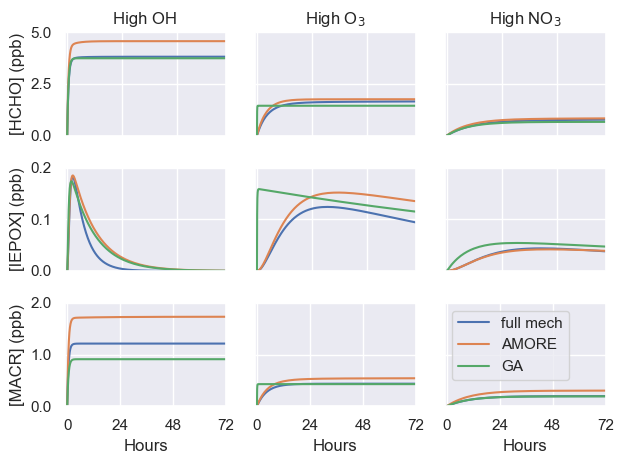

In [325]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].plot(x_values1, y_values1)
axs[0, 0].plot(x_values1, z_values1)
axs[0, 0].plot(x_values1, w_values1)
axs[0, 0].set_ylim([0, 5])
axs[0, 0].set_title('High OH')
yticks = [0,2.5,5]
axs[0, 0].set_yticks(yticks)
axs[0, 0].set(xlabel='hours', ylabel='[HCHO] (ppb)')
axs[0, 0].set_xlim([-1, 72])

axs[0, 1].plot(x_values2, y_values2)
axs[0, 1].plot(x_values2, z_values2)
axs[0, 1].plot(x_values2, w_values2)
axs[0, 1].set_ylim([0, 5])
yticks = [0,2.5,5]
axs[0, 1].set_yticks(yticks)
axs[0, 1].set_title('High O$_3$')
axs[0, 1].set_xlim([-1, 72])

axs[0, 2].plot(x_values3, y_values3)
axs[0, 2].plot(x_values3, z_values3)
axs[0, 2].plot(x_values3, w_values3)
axs[0, 2].set_ylim([0, 5])
yticks = [0,2.5,5]
axs[0, 2].set_yticks(yticks)
axs[0, 2].set_title('High NO$_3$')
axs[0, 2].set_xlim([-1, 72])

axs[1, 0].plot(x_values4, y_values4)
axs[1, 0].plot(x_values4, z_values4)
axs[1, 0].plot(x_values4, w_values4)
axs[1, 0].set_ylim([0, 0.2])
axs[1, 0].set(xlabel='Hours', ylabel='[IEPOX] (ppb)')
axs[1, 0].set_xlim([-1, 72])


axs[1, 1].plot(x_values5, y_values5)
axs[1, 1].plot(x_values5, z_values5)
axs[1, 1].plot(x_values5, w_values5)
axs[1, 1].set_ylim([0, 0.2])
axs[1, 1].set_xlim([-1, 72])


axs[1, 2].plot(x_values6, y_values6)
axs[1, 2].plot(x_values6, z_values6)
axs[1, 2].plot(x_values6, w_values6)
axs[1, 2].set_ylim([0, 0.2])
axs[1, 2].set_xlim([-1, 72])


axs[2, 0].plot(x_values7, y_values7)
axs[2, 0].plot(x_values7, z_values7)
axs[2, 0].plot(x_values7, w_values7)
axs[2, 0].set_ylim([0, 2])
axs[2, 0].set_xlim([-1, 72])
xticks = [0,24,48,72]
axs[2, 0].set_xticks(xticks)
yticks = [0,1.0,2.0]
axs[2, 0].set_yticks(yticks, labels=['0.0','1.0','2.0'])
axs[2, 0].set(xlabel='Hours', ylabel='[MACR] (ppb)')

axs[2, 1].plot(x_values8, y_values8)
axs[2, 1].plot(x_values8, z_values8)
axs[2, 1].plot(x_values8, w_values8)
xticks = [0,24,48,72]
axs[2, 1].set_xticks(xticks)
axs[2, 1].set_ylim([0, 2])
axs[2, 1].set_xlim([-1, 72])
axs[2, 1].set(xlabel='Hours')


axs[2, 2].plot(x_values9, y_values9, label = 'full mech')
axs[2, 2].plot(x_values9, z_values9, label = 'AMORE')
axs[2, 2].plot(x_values9, w_values9, label = 'GA')
xticks = [0,24,48,72]
axs[2, 2].set_xticks(xticks)
axs[2, 2].set_ylim([0, 2])
axs[2, 2].set_xlim([-1, 72])
axs[2, 2].set(xlabel='Hours')

axs[2,2].legend(loc="upper left")
#for ax in axs.flat:
 #   ax.set(xlabel='hours', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

plt.savefig('multi_conc.png')

In [231]:
x_values1

[0.0,
 9.07e-11,
 1.81e-10,
 2.72e-10,
 6.71e-10,
 1.07e-09,
 1.47e-09,
 1.87e-09,
 3.25e-09,
 4.64e-09,
 6.02e-09,
 7.41e-09,
 1.23e-08,
 1.72e-08,
 2.2e-08,
 2.69e-08,
 3.18e-08,
 4.97e-08,
 6.76e-08,
 8.56e-08,
 1.04e-07,
 1.21e-07,
 1.39e-07,
 1.87e-07,
 2.35e-07,
 2.82e-07,
 3.3e-07,
 3.77e-07,
 4.25e-07,
 5.04e-07,
 5.83e-07,
 6.62e-07,
 7.4e-07,
 8.19e-07,
 8.98e-07,
 1.03e-06,
 1.17e-06,
 1.3e-06,
 1.44e-06,
 1.57e-06,
 1.71e-06,
 2e-06,
 2.28e-06,
 2.57e-06,
 2.86e-06,
 3.15e-06,
 3.44e-06,
 4.02e-06,
 4.6e-06,
 5.18e-06,
 5.76e-06,
 6.33e-06,
 6.91e-06,
 8.4e-06,
 9.88e-06,
 1.14e-05,
 1.29e-05,
 1.43e-05,
 1.89e-05,
 2.35e-05,
 2.81e-05,
 3.26e-05,
 3.72e-05,
 4.34e-05,
 4.97e-05,
 5.59e-05,
 6.21e-05,
 6.83e-05,
 7.45e-05,
 8.9e-05,
 0.000103559,
 0.000118077,
 0.000132596,
 0.000147115,
 0.000161634,
 0.00019895,
 0.000236266,
 0.000273582,
 0.000310898,
 0.000348214,
 0.00038553,
 0.000463178,
 0.000540826,
 0.000618473,
 0.000696121,
 0.000773769,
 0.000851417,
 0.001057

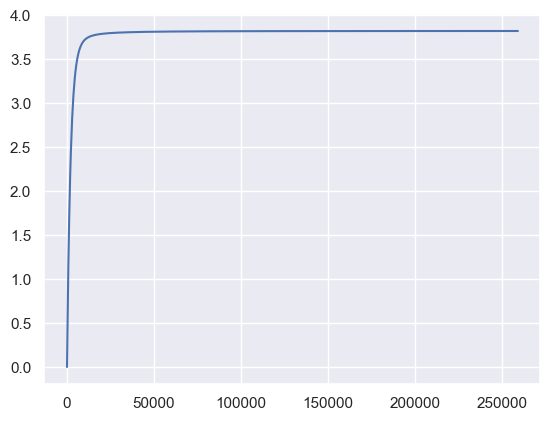

In [190]:
plt.plot(x_values1, y_values1, z_values1, w_values1)

In [226]:
y_values5

[0.0,
 1.142595e-43,
 6.23719e-43,
 1.99648e-42,
 5.5524e-41,
 2.6963799999999997e-40,
 8.3086e-40,
 2.0081500000000002e-39,
 1.0528100000000001e-38,
 3.2182e-38,
 7.6304e-38,
 1.5489e-37,
 9.826999999999999e-37,
 3.4084e-36,
 8.738e-36,
 1.8705e-35,
 3.547e-35,
 8.372e-35,
 1.6936e-34,
 3.0739999999999996e-34,
 5.173e-34,
 8.175e-34,
 1.231e-33,
 2.47e-33,
 4.459e-33,
 7.450000000000001e-33,
 1.1709999999999999e-32,
 1.758e-32,
 2.535e-32,
 4.358e-32,
 7.01e-32,
 1.069e-31,
 1.564e-31,
 2.208e-31,
 3.029e-31,
 5.5e-31,
 9.2e-31,
 1.443e-30,
 2.154e-30,
 3.093e-30,
 4.29e-30,
 7.67e-30,
 1.264e-29,
 1.9579999999999998e-29,
 2.877e-29,
 4.073e-29,
 5.56e-29,
 1.107e-28,
 1.9519999999999997e-28,
 3.155e-28,
 4.787e-28,
 6.929e-28,
 3.605e-27,
 1.0059999999999999e-26,
 2.1489999999999998e-26,
 3.9259999999999997e-26,
 8.456999999999999e-26,
 1.559e-25,
 2.593e-25,
 4.0119999999999997e-25,
 5.859e-25,
 1.5279999999999999e-24,
 3.128e-24,
 5.554e-24,
 8.983e-24,
 1.7619999999999998e-23,
 3.

In [228]:
w_values5[-100]

nan

In [ ]:
'/Users/woods/OneDrive/Documents/Python/Code/For Ankit 2/GA RUNs for Paper/GA_RUN_4_8_8_0_500_print_1.txt'

In [309]:
file = open('/Users/woods/OneDrive/Documents/Python/Code/For Ankit 2/GA RUNs for Paper/GA_RUN_4_8_8_0_500_print_1.txt', "r")
content_1=file.readlines()
file.close()

file = open('/Users/woods/OneDrive/Documents/Python/Code/For Ankit 2/GA RUNs for Paper/GA_RUN_4_8_8_0_500_print_2.txt', "r")
content_2=file.readlines()
file.close()


file = open('/Users/woods/OneDrive/Documents/Python/Code/For Ankit 2/GA RUNs for Paper/GA_RUN_4_8_8_0_500_print_3.txt', "r")
content_3=file.readlines()
file.close()


file = open('/Users/woods/OneDrive/Documents/Python/Code/For Ankit 2/GA RUNs for Paper/GA_RUN_4_8_8_0_500_print_4.txt', "r")
content_4=file.readlines()
file.close()


file = open('/Users/woods/OneDrive/Documents/Python/Code/For Ankit 2/GA RUNs for Paper/GA_RUN_4_8_8_0_500_print_5.txt', "r")
content_5=file.readlines()
file.close()

In [315]:
gen_data_1 = []
gen = []
for i in content_1:
    if 'Time taken' in i:
        value = float(i.split(': ')[1])
        gen.append(value)
    elif 'Generation' in i:
        gen_data_1.append(gen)
        gen = []

gen_mins_1 = [min(i) for i in gen_data_1[1:]]

In [316]:
gen_data_2 = []
gen = []
for i in content_2:
    if 'Time taken' in i:
        value = float(i.split(': ')[1])
        gen.append(value)
    elif 'Generation' in i:
        gen_data_2.append(gen)
        gen = []
gen_mins_2 = [min(i) for i in gen_data_2[1:]]

In [317]:
gen_data_3 = []
gen = []
for i in content_3:
    if 'Time taken' in i:
        value = float(i.split(': ')[1])
        gen.append(value)
    elif 'Generation' in i:
        gen_data_3.append(gen)
        gen = []
gen_mins_3 = [min(i) for i in gen_data_3[1:]]

In [318]:
gen_data_4 = []
gen = []
for i in content_4:
    if 'Time taken' in i:
        value = float(i.split(': ')[1])
        gen.append(value)
    elif 'Generation' in i:
        gen_data_4.append(gen)
        gen = []

gen_mins_4 = [min(i) for i in gen_data_4[1:]]

In [319]:
gen_data_5 = []
gen = []
for i in content_5:
    if 'Time taken' in i:
        value = float(i.split(': ')[1])
        gen.append(value)
    elif 'Generation' in i:
        gen_data_5.append(gen)
        gen = []

gen_mins_5 = [min(i) for i in gen_data_5[1:]]

In [290]:
gen_mins = [min(i) for i in gen_data[1:]]

In [308]:
len(gen_mins_2)

0

In [303]:
x = np.arange(0,501)

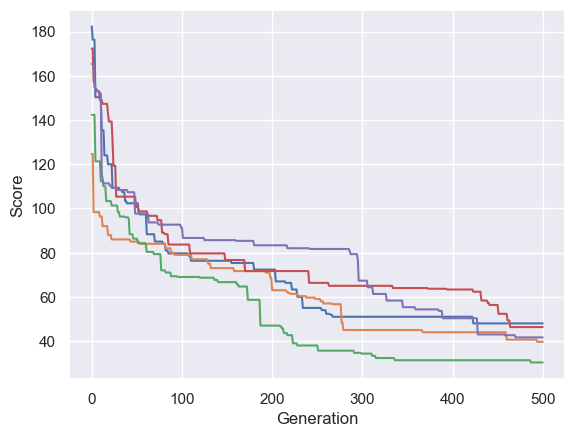

In [324]:
plt.plot(x, gen_mins_1)
plt.plot(x, gen_mins_2)
plt.plot(x, gen_mins_3)
plt.plot(x, gen_mins_4)
plt.plot(x, gen_mins_5)
plt.xlabel('Generation')
plt.ylabel('Score')
plt.savefig('score_vs_gen.png')